In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D

import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,Y_train),(X_test,Y_test)  = fashion_mnist.load_data()

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

X_train = X_train/255.0
X_test  = X_test/255.0

In [3]:
def show_img(img):
    img  = np.array(img,dtype='float')
    img = img.reshape((28,28))
    plt.imshow(img)
    
def visualize_samples(n_rows = 5, n_cols = 5):
    n_samples = n_rows * n_cols
    rand_idx = np.random.randint(0,X_train.shape[0],n_samples)
    fig,axes = plt.subplots(n_rows,n_cols,figsize=(15,15))
    axes = axes.flatten()

    for i,ax in enumerate(axes):
        img = X_train[rand_idx[i]]
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def plot_history(history):
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2 ,1)
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy')

    plt.subplot(1, 2 ,2)
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.legend(loc='upper right')
    plt.title('Loss')
    plt.show()

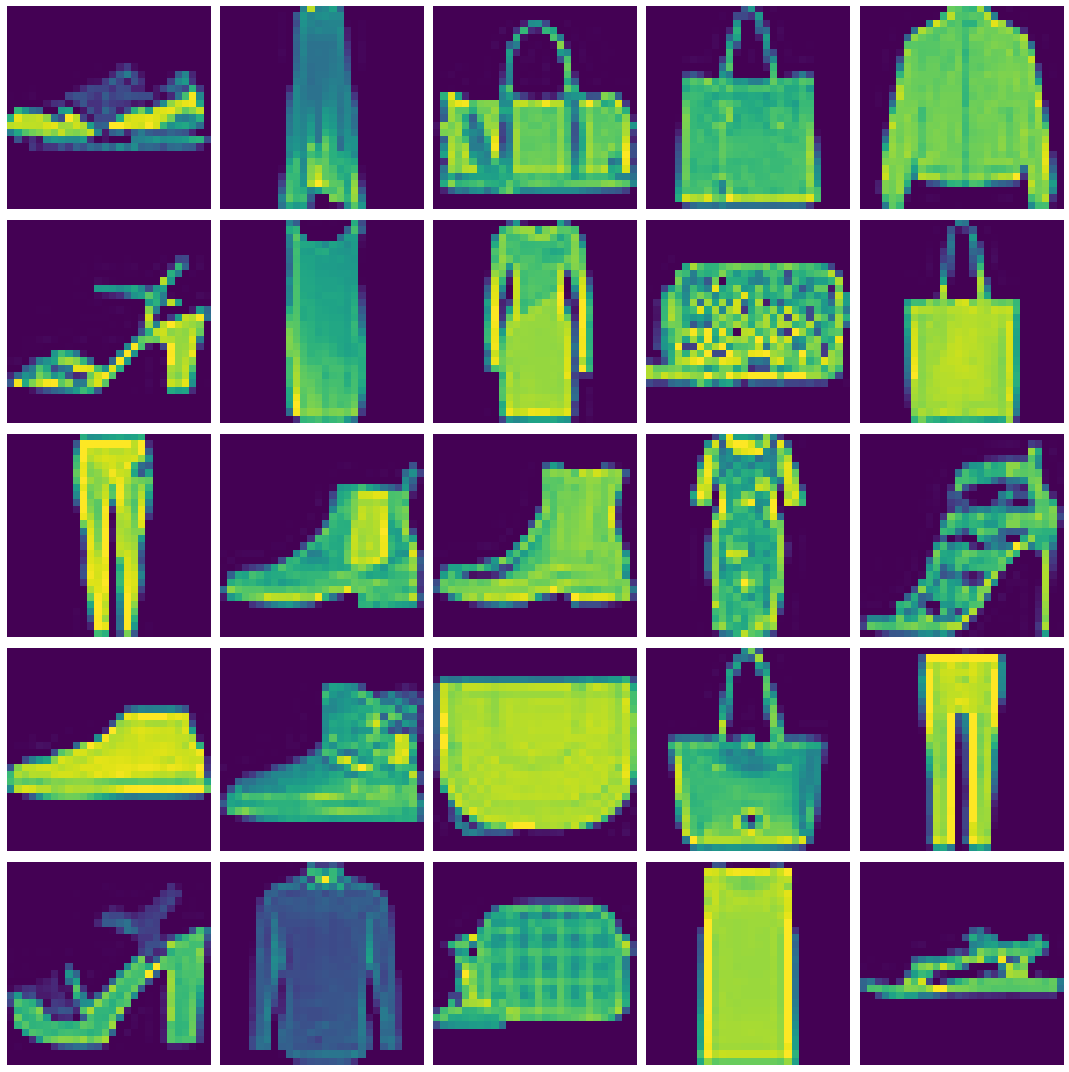

In [4]:
visualize_samples()

In [5]:
model = Sequential()
model.add(Conv2D(16,input_shape=(28,28,1),kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(GlobalAveragePooling2D())

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         7

Epoch 1/10
797/797 [==============================] - 7s 5ms/step - loss: 0.6893 - accuracy: 0.7440 - val_loss: 0.5099 - val_accuracy: 0.8149
Epoch 2/10
797/797 [==============================] - 4s 5ms/step - loss: 0.4297 - accuracy: 0.8434 - val_loss: 0.3869 - val_accuracy: 0.8624
Epoch 3/10
797/797 [==============================] - 4s 5ms/step - loss: 0.3531 - accuracy: 0.8736 - val_loss: 0.3396 - val_accuracy: 0.8737
Epoch 4/10
797/797 [==============================] - 4s 5ms/step - loss: 0.3159 - accuracy: 0.8847 - val_loss: 0.3158 - val_accuracy: 0.8862
Epoch 5/10
797/797 [==============================] - 4s 5ms/step - loss: 0.2915 - accuracy: 0.8943 - val_loss: 0.2888 - val_accuracy: 0.8944
Epoch 6/10
797/797 [==============================] - 4s 5ms/step - loss: 0.2720 - accuracy: 0.8994 - val_loss: 0.3021 - val_accuracy: 0.8888
Epoch 7/10
797/797 [==============================] - 4s 6ms/step - loss: 0.2554 - accuracy: 0.9066 - val_loss: 0.2646 - val_accuracy: 0.9032
Epoch 

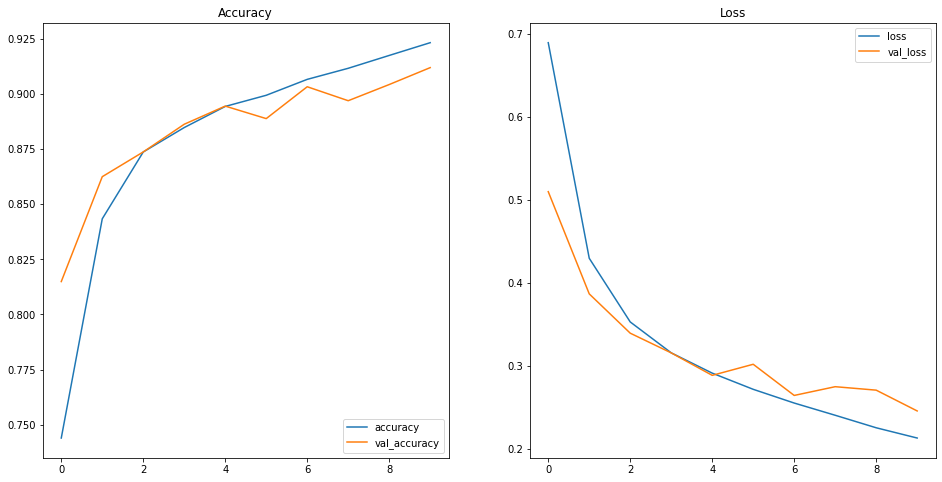

In [6]:
model.compile(
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'],
            optimizer='adam'
            )

history = model.fit(
                X_train,
                Y_train,
                batch_size=64, 
                epochs=10, 
                validation_split=0.15, 
                shuffle=True
                )
plot_history(history)

In [7]:
cam_model  = Model(
                inputs=model.input,
                outputs=(
                        model.layers[-3].output, # Last convolutional layer
                        model.layers[-1].output  # Output Layer
                        ))
cam_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0     

In [24]:
output_layer = model.layers[-1]
gap_weights_l = output_layer.get_weights()
print("gap_weights_l index 0 contains weights ", gap_weights_l[0].shape)
print("gap_weights_l index 1 contains biases ", gap_weights_l[1].shape)

gap_weights = gap_weights_l[0] #only store Store the weights
print(f"There are {gap_weights.shape[0]} feature weights and {gap_weights.shape[1]} classes.")

gap_weights_l index 0 contains weights  (128, 10)
gap_weights_l index 1 contains biases  (10,)
There are 128 feature weights and 10 classes.


In [25]:
features, classes = cam_model.predict(X_test)
print(f"features shape: {features.shape}")
print(f"classes shape: {classes.shape}")

features shape: (10000, 3, 3, 128)
classes shape: (10000, 10)


In [48]:
def test_on_img(id_):
    assert id_ < X_test.shape[0], "id_ must be less than X_test.shape[0]"

    img = X_test[id_]
    class_true = Y_test[id_]
    class_pred = np.argmax(classes[id_])
    img_feature = features[id_, :] # (3,3,128)

    img_feature_scaled = sp.ndimage.zoom(img_feature, (28/3, 28/3,1), order=2) # (28, 28, 128)

    gap_weights_for_one_class = gap_weights[:,class_pred] # (128,) 
    cam_output = np.dot(img_feature_scaled, gap_weights_for_one_class) # (28, 28)
    
    if classes[id_][class_pred]>0.95: # if the predicted class is very likely
        cmap_str = 'Greens'
    else:                             # if the predicted class is not very likely
        cmap_str = 'Reds'

    return img, class_true, class_pred, cam_output, cmap_str

In [57]:
def visualize_cam(n_samples = 25):
    rand_idxs = np.random.randint(0,X_test.shape[0],n_samples)

    for rand_idx in rand_idxs:
        img, class_true, class_pred, cam_output, cmap_str = test_on_img(rand_idx)
        print(f"class_true: {class_true}, class_pred: {class_pred}, likelihood: {classes[rand_idx][class_pred]}")
        plt.imshow(np.squeeze(img,-1), alpha=0.5)
        plt.imshow(cam_output, cmap=cmap_str, alpha=0.5) # Overlay CAM on the original image
        plt.show()

class_true: 4, class_pred: 4, likelihood: 0.9648976922035217


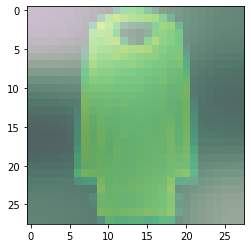

class_true: 8, class_pred: 8, likelihood: 0.9999481439590454


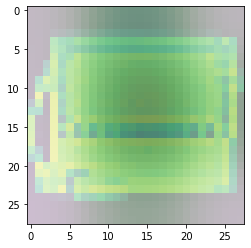

class_true: 8, class_pred: 8, likelihood: 0.9755752682685852


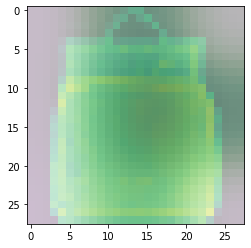

class_true: 5, class_pred: 5, likelihood: 0.9999998807907104


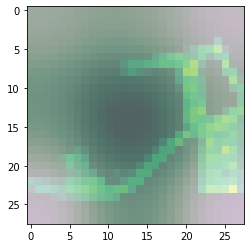

class_true: 3, class_pred: 3, likelihood: 0.7365068793296814


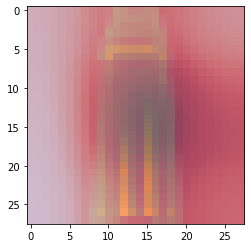

class_true: 3, class_pred: 3, likelihood: 0.9977130889892578


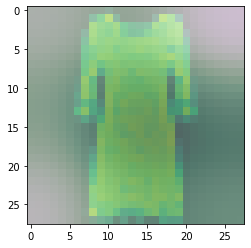

class_true: 5, class_pred: 5, likelihood: 0.999998927116394


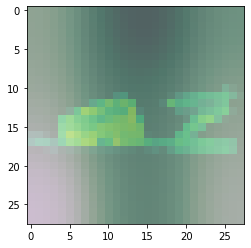

class_true: 5, class_pred: 5, likelihood: 0.9565091133117676


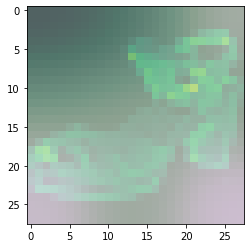

class_true: 0, class_pred: 0, likelihood: 0.971760630607605


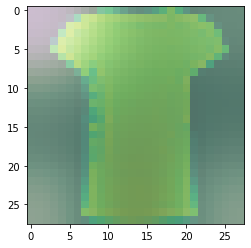

class_true: 1, class_pred: 1, likelihood: 0.9981305003166199


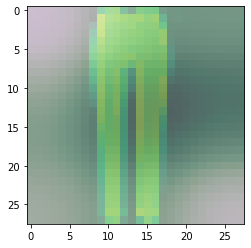

class_true: 2, class_pred: 2, likelihood: 0.9709721207618713


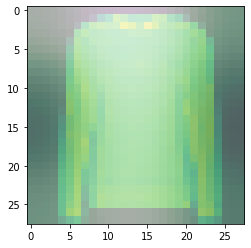

class_true: 7, class_pred: 7, likelihood: 0.9859060049057007


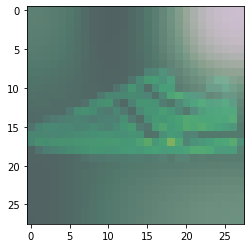

class_true: 4, class_pred: 4, likelihood: 0.8001802563667297


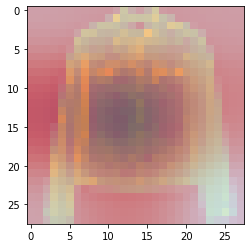

class_true: 9, class_pred: 9, likelihood: 0.9999159574508667


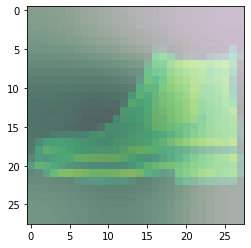

class_true: 6, class_pred: 6, likelihood: 0.9993553757667542


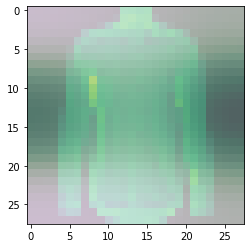

class_true: 4, class_pred: 4, likelihood: 0.947809636592865


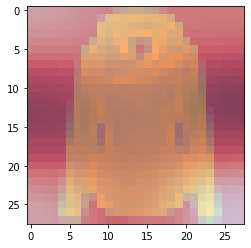

class_true: 1, class_pred: 1, likelihood: 0.8913695216178894


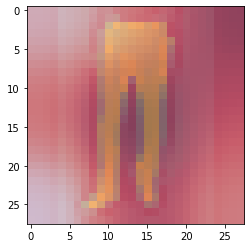

class_true: 7, class_pred: 7, likelihood: 0.9999499320983887


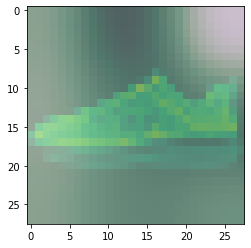

class_true: 1, class_pred: 1, likelihood: 0.9693137407302856


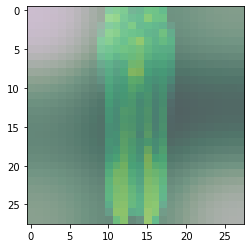

class_true: 1, class_pred: 1, likelihood: 0.9999973773956299


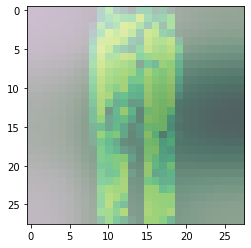

class_true: 4, class_pred: 4, likelihood: 0.7409708499908447


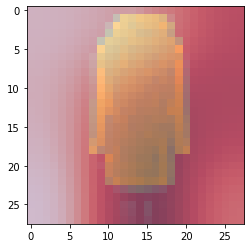

class_true: 8, class_pred: 8, likelihood: 1.0


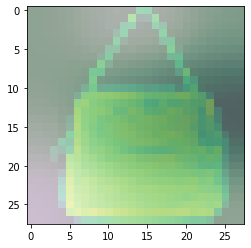

class_true: 3, class_pred: 3, likelihood: 0.9975420236587524


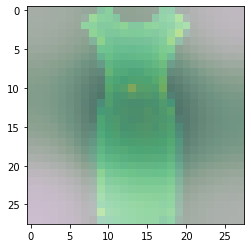

class_true: 0, class_pred: 0, likelihood: 0.9912258982658386


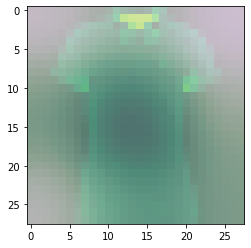

class_true: 5, class_pred: 5, likelihood: 0.9999845027923584


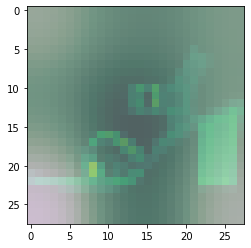

In [58]:
visualize_cam()